In [61]:
import numpy as np

Let's let threshold = 1/2, and vary probability p

lets use D odd to avoid edge cases here

with probability $p^2$, it's HRSS t=1/2, = random (flip if *above* 1/2, random choose if = 1/2), might be edge case

with probability $(1-p)^2$, it's random (no flips)

with probability $2p(1-p)$, one of them flips. this should improve.
* if = initially (1/2 chance), then will +1 when num_same > T-1
* if not = initially (1/2 chance), then will -1 when num_same > T

Let's use T = D/2, and we're deciding among D-1 edges in triangle-free case

* Then first case is chance of binomial (D-1, 1/2)  > D/2 - 1
* Then second case is chance of binomail (D-1, 1/2) > D/2

assuming D odd

D-1 even, so (D-1)/2 is the only option that is in only one case

This happens with probability ((D-1) choose (D-1)/2) / 2^(D-1)

So the cut fraction is 1/2 + p(1-p) ((D-1) choose (D-1)/2) / 2^(D-1)

at large D, this approximates $1/\sqrt{\pi (D-1)/2}$

so cut fraction = $1/2 + p(1-p)\sqrt{\pi(D-1)/2}$

maximized at p = 1/2, so it's $1/2 + \frac{1}{4 \sqrt{\pi(D-1)/2}}$

$1/2 + 1/\sqrt{8\pi(D-1)}$


In [62]:
from numpy import pi

In [63]:
(8*pi)**-0.5

0.19947114020071635

.19947 is not far from .33649 (1.5x I guess)

In [64]:
.177/4

0.04425

In [65]:
.19947+.04425

0.24372

This is okay (better than Shearer), but not great.

What about with a better choice of threshold?

T = D/2 + k\sqrt{D}

Then, with (1-p)^2, no change (random)

With p^2, it's HRSS (with advantage given by D and T), which is $\sqrt{2/(D\pi)}e^{-2k^2}erf(k\sqrt{2})$

With 2p(1-p), it's the same as above

This will have advantage $p(1-p) 1/\sqrt{\pi (D-1)/2} e^{-(2k)^2 D / 2(D-1)}$

$\approx p(1-p) 1/\sqrt{\pi (D-1)/2} e^{-2k^2} + p^2 \sqrt{2/(D\pi)}e^{-2k^2}erf(k\sqrt{2})$

$\sqrt{2/(D\pi)} e^{-2k^2} (p - p^2 + p^2 erf(k\sqrt{2}))$

given k, i saw earlier that this is maximized at $p =0.5/(1 - erf(k\sqrt{2}))$, of course check 0<=p<=1

then, advantage is
$\sqrt{2/(D\pi)} e^{-2k^2} 0.25 / (1 - erf(k\sqrt{2}))$

## different approach

In [66]:
from math import erf, e

In [67]:
import matplotlib.pyplot as plt

In [68]:
inps = np.linspace(-1, 1, 1000)

In [69]:
def valid(k):
    return erf(k*2**0.5) <= 0.5

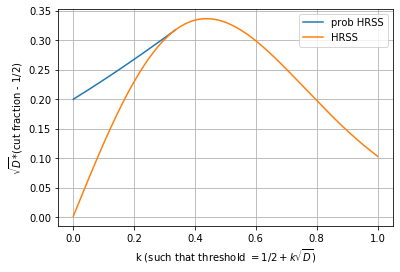

In [70]:
inps = np.linspace(0.001, 1, 1000)
plt.plot(inps, [(2/pi)**0.5*e**(-2*x*x)/(1-erf(x*2**0.5))/4 if valid(x) else None for x in inps], label="prob HRSS")
plt.plot(inps, [(2/pi)**0.5*e**(-2*x*x)*erf(x*2**0.5) for x in inps], label="HRSS")
plt.xlabel("k (such that threshold $= 1/2 + k\sqrt{D}$)")
plt.ylabel("$\sqrt{D}$*(cut fraction - 1/2)")
plt.grid()
plt.legend()
plt.savefig('probHRSS.png')

## complete graph

N = 4.. 6 edges... cut 4 of them... E* (1/2 + 1/(2*3)) -> 6 * (1/2 + 1/6) = 4 :-)

N nodes, D = N-1... N(N-1)/2 edges = D(D+1)/2 edges

Cut (N/2)(N/2) edges if N even... N^2 / 4...

N^2/4 vs N^2/4 - N/4 ...

So 1/2 + N/4 / (N^2 - N)/2 ...
1/2 + 1/2  /  (N - 1)
1/2 + 1/2 / D

In [71]:
def g(D, k):
    num = 0.25 * 2/(pi*D) * e**(-4*k*k)
    den = (2/pi/D)**0.5 * e**(-2*k*k) + 0.5 - 0.5*erf(k*2**0.5)
    return num/den

In [72]:
inps = np.linspace(0, 2, 100)

Text(0, 0.5, 'advantage*D')

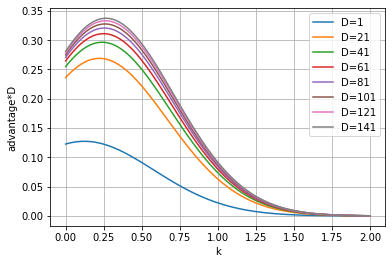

In [73]:
for D in range(1, 150, 20):
    plt.plot(inps, [D*g(D, i) for i in inps], label="D=" + str(D))
plt.grid()
plt.legend()
plt.xlabel("k")
plt.ylabel("advantage*D")

In [74]:
D = 111
assert D % 2 == 1
print("D=" + str(D))
print("num edges: " + str(0.5*D*(D+1)))
print("50%      : " + str(0.25*D*(D+1)))
print("k=0.25   : " + str(0.5*D*(D+1)*(0.5 + g(D, 0.25))))
print("max cut  : " + str(0.5*D*(D+1)*(0.5 + 0.5/D)))


D=111
num edges: 6216.0
50%      : 3108.0
k=0.25   : 3126.4915881044303
max cut  : 3135.9999999999995


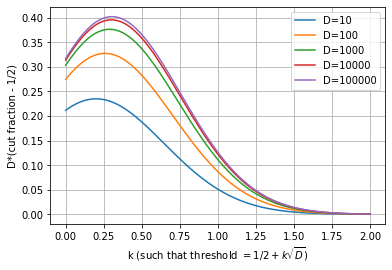

In [75]:
for D in [10, 100, 1000, 10000, 100000]:
    inps = np.linspace(0, 2, 1000)
    plt.plot(inps, [D*h(i, D) for i in inps], label="D=" + str(D))
plt.xlabel("k (such that threshold $= 1/2 + k\sqrt{D}$)")
plt.ylabel("D*(cut fraction - 1/2)")
plt.legend()
plt.grid()
plt.savefig('probcomplete.png')

just for fun; you can use minimize to get a more accurate reading

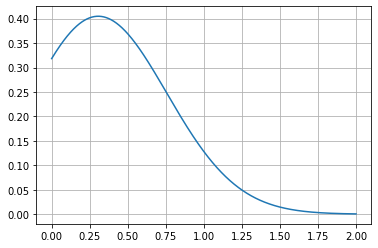

In [80]:
def h2(k):
    return e**(-4*k*k) / (pi*(1 - erf(k*2**0.5)))

inps = np.linspace(0, 2, 1000)
plt.plot(inps, [h2(i) for i in inps])
plt.grid()

## what about hastings for general Y

thinking about Y >> \sqrt{D}

In [83]:
def cdf(x):
    return 0.5 + 0.5*erf(x*2**-0.5)

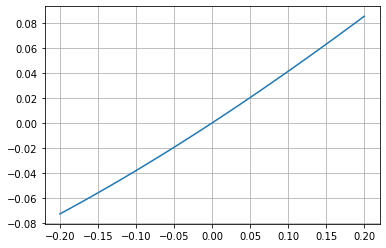

In [84]:
inps = np.linspace(-0.2, 0.2, 100)
plt.plot(inps, [cdf(x)**2-0.25 for x in inps])
plt.grid()

cdf(x)^2 average is 0.25 + 0.25*erf^2 average .. erf propto z at small values.

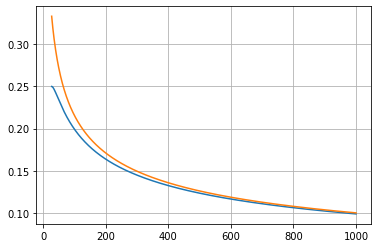

In [85]:
inps = np.linspace(27, 1000,1000)
plt.plot(inps, inps**(2/3)/(inps - inps**(2/3)) - (inps**(2/3)/(inps - inps**(2/3)))**2)
plt.plot(inps, inps**(-1/3))
plt.grid()

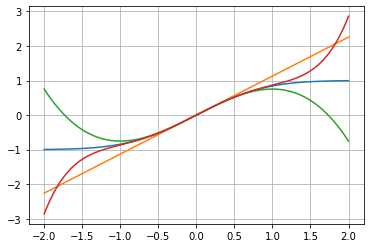

In [86]:
inps = np.linspace(-2,2, 1000)
plt.plot(inps, [erf(x) for x in inps])
plt.plot(inps, [x*2*pi**-0.5 for x in inps])
plt.plot(inps, [(x-x**3/3)*2*pi**-0.5 for x in inps])
plt.plot(inps, [(x-x**3/3+x**5/10)*2*pi**-0.5 for x in inps])

plt.grid()

In [87]:
from numpy.random import normal

In [88]:
from scipy.special import erf

In [89]:
D = 1000000
pts = 10000
erf2 = lambda i: erf(i)*erf(i)

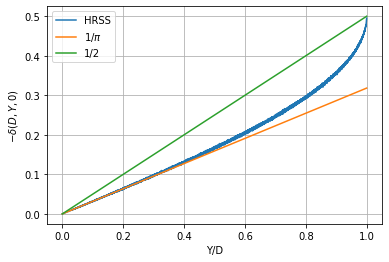

In [90]:
inps = np.arange(1, D, 100)
plt.plot(inps/D, [np.average(0.5*erf2( (Y/(D-Y))**0.5 * 2**-0.5  * normal(size=pts) )) for Y in inps], label="HRSS")
plt.plot(inps/D, inps/pi/D, label="1/$\pi$")
plt.plot(inps/D, inps/2/D, label="1/2")

plt.xlabel("Y/D")
plt.ylabel("$-\delta(D, Y, 0)$")
plt.legend()
plt.grid()
plt.savefig('HRSS_YthetaD.png')

At small Y/D, the cut advantage is -Y/(pi D), but eventually grows to -Y/(2D).

At larger Y/D, the cut advantage drops further

# qaoa complete

In [91]:
def q(c, D):
    pt1 = c**(D-1) - 1
    pt2 = (1 - c**(D-1))**2
    pt3 = 16*(1-c)/2 * ((1+c)/2)**(D-1)
    return 0.25 * (pt1 + (pt2 + pt3)**0.5)

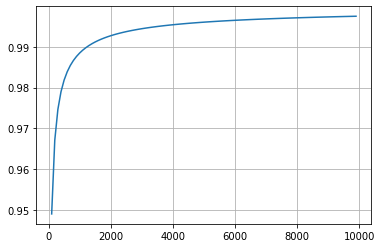

In [92]:
inps = range(100, 10000, 100)
plt.plot(inps, [D*q(1-2*(D-1)**-(4/3), D) for D in inps])
plt.grid()

(0.999999569113062, 1.000000215443469)

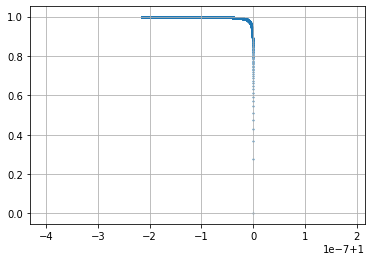

In [93]:
D = 100000
eps = D**(-4/3)
inps = np.linspace(1-eps, 1, 10000)
outs = [D*q(i, D) for i in inps]
plt.scatter(inps, outs, s=1)
plt.grid()
plt.xlim(1-2*eps, 1+eps)

question: does this match 1/D? 

In [94]:
q(.9999999, 1e8)*1e8

0.06738252456006677

In [95]:
inps[np.argmax(outs)]

0.999999784556531

In [96]:
np.max(outs)

0.9990539652137732

# max qaoa a approx b

In [97]:
def efn(k):
    return k*((1 + k*k/4)**0.5 - k/2)

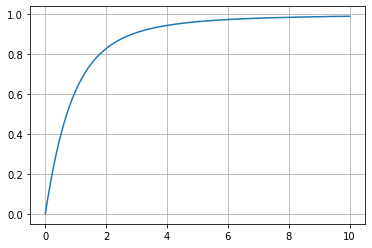

In [98]:
inps = np.linspace(0, 10,1000)
plt.plot(inps, efn(inps))
plt.grid()

for the sqrt D region

In [99]:
def maybe(k):
    return k*e**(-k*k/2)

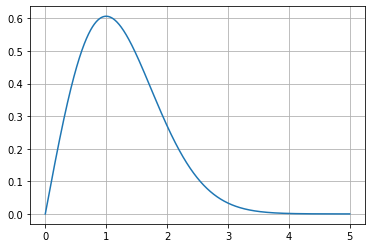

In [100]:
inps = np.linspace(0, 5, 1000)
plt.plot(inps, maybe(inps))
plt.grid()

compare sqrt D for prob HRSS and QAOA

looks like QAOA wins, but it's not necessarily optimal for prob HRSS

In [101]:
e**(-4*0.5*0.5)

0.36787944117144233

(-1, 1)

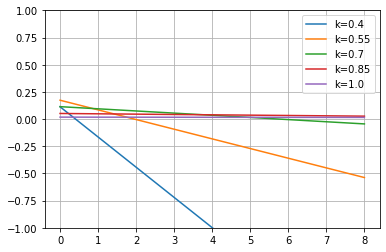

In [102]:
inps = np.arange(1, 10)
for k in np.linspace(0.4, 1, 5):
# plt.plot(inps, -inps, label="regular")
    plt.plot(e**(-4*k*k)*erf(2*k) - e**(-8*k*k)*inps, label="k=" + str(k))
plt.grid()
plt.legend()
plt.ylim(-1, 1)

Text(0, 0.5, 'v; $2\\delta = v/Y$')

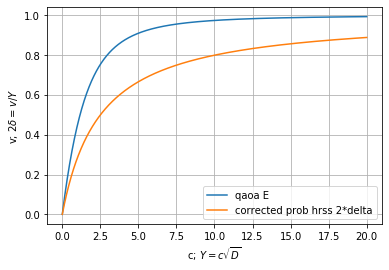

In [103]:
k=0
inps = np.linspace(0, 20,1000)
plt.plot(inps, efn(inps*e**-0.5), label='qaoa E')
plt.plot(inps, 2*inps/(e**(2*k*k)*(8*pi)**0.5 * (1 - erf(k*2**0.5)) + 2*(inps)), label='corrected prob hrss 2*delta')
# plt.plot(inps, 2*((2/pi)**0.5 * e**(-2*k*k)*erf(k*2**0.5) - e**(-4*k*k)*inps/pi) * 1/inps, label='hrss')
# plt.plot(inps, (8*pi)**-0.5*inps)
plt.grid()
plt.legend()
plt.xlabel('c; $Y= c\sqrt{D}$')
plt.ylabel('v; $2\delta = v/Y$')

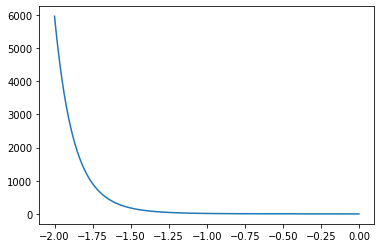

In [104]:
inps = np.linspace(0, -2, 1000)
plt.plot(inps, e**(2*inps*inps) * (1 - erf(inps * 2**0.5)))

Now just lookin at Cuv

In [105]:
def cuv(b, g, D):
    return 0.5* sin(4*b) * sin(g) * cos(g)**(D-1)    - 0.25*sin(2*b)**2 * (1 - cos(2*g)**(D-1))

In [106]:
import numpy as np
from numpy import sin, cos, arctan
import matplotlib.pyplot as plt

In [111]:
def maxh(D):
    inps = np.linspace(0, 2, 1000)
    return max([h(i, D) for i in inps])

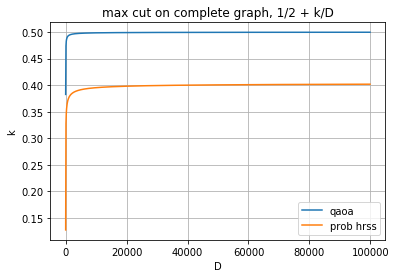

In [112]:
inps = np.arange(1, 100000, 100)
exp = 2/3
plt.plot(inps, [D*cuv((1/2/D) /D**(-exp), D**(-exp), D) for D in inps], label='qaoa')
plt.plot(inps, [D*maxh(D) for D in inps], label='prob hrss')
plt.grid()
plt.xlabel("D")
plt.ylabel("k")
plt.title("max cut on complete graph, 1/2 + k/D")
plt.legend()
plt.savefig('completegraph2.png')

# testing modified taylor approx erf

In [113]:
def fn(a, eps):
    return erf(a) + 2*pi**-0.5*e**(-a*a) * (eps + a*eps*eps/2)

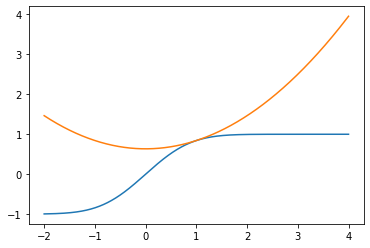

In [114]:
a = 1
dist = 3
inps = np.linspace(a-dist, a+dist, 1000)
plt.plot(inps, erf(inps))
plt.plot(inps, [fn(a, i-a) for i in inps])

test

In [115]:
D=100000
pts=10000

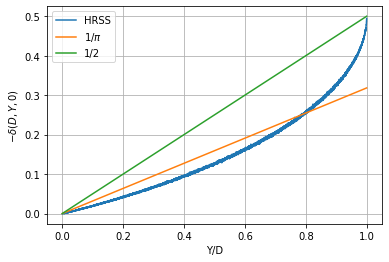

In [116]:
k=0.25
inps = np.arange(1, D, 10)
outs = []
for Y in inps:
    samples = normal(size=pts)
    s=(D-Y)**0.5
    pt1 = erf(2*k + 2**-0.5/s  * ( 1 + Y**0.5* samples ))
    pt2 = erf(2*k + 2**-0.5/s  * ( 1 - Y**0.5* samples ))
    pt3 = erf(2*k + 2**-0.5/s  * (-1 - Y**0.5* samples ))
    outs.append(-0.25*np.average(pt1*pt2 - pt3**2))
plt.plot(inps/D, outs, label="HRSS")
plt.plot(inps/D, inps/pi/D, label="1/$\pi$")
plt.plot(inps/D, inps/2/D, label="1/2")

plt.xlabel("Y/D")
plt.ylabel("$-\delta(D, Y, 0)$")
plt.legend()
plt.grid()


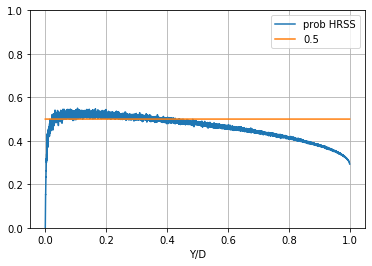

In [117]:
# prob hrss
# k=0 isn't bad, because when you adjust it you have to beat it by e^4k^2 ... 
#  looks like k!=0 can win where k=0 can't... up to around 40-50%...
k=0.15
inps = np.arange(1, D, 10)
outs = []
for Y in inps:
    samples = normal(size=pts)
    s=(D-Y)**0.5
    pt1 = erf(-2*k + 2**-0.5/s  * ( 1 + Y**0.5* samples ))
    pt2 = erf(-2*k + 2**-0.5/s  * ( 1 - Y**0.5* samples ))
    pt3 = erf(-2*k + 2**-0.5/s  * (-1 - Y**0.5* samples ))
    outs.append(2*pi*D*-0.25*np.average(pt1*pt2 - pt3**2) * e**(4*k*k))
plt.plot(inps/D, inps/np.array(outs), label="prob HRSS")
plt.plot(inps/D, [0.5]*len(inps), label='0.5')
# plt.plot(inps/D, inps/pi/D, label="1/$\pi$")
# plt.plot(inps/D, inps/2/D, label="1/2")

plt.ylim(0, 1)
plt.xlabel("Y/D")
# plt.ylabel("$-\delta(D, Y, 0)$")
plt.legend()
plt.grid()

another test 11.20.20

In [118]:
inps = np.linspace(-2, 2, 1000)

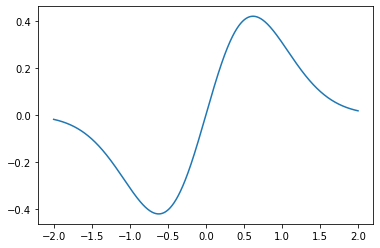

In [119]:
plt.plot(inps, e**(-inps**2)*erf(inps))

In [120]:
0.4*2**0.5/pi**0.5

0.31915382432114625

In [121]:
1/pi

0.3183098861837907

In [122]:
0.41*(2/pi)**0.5

0.3271326699291748

In [123]:
a = np.array([1,2,3])
b = np.array([4,5])

(0, 1)

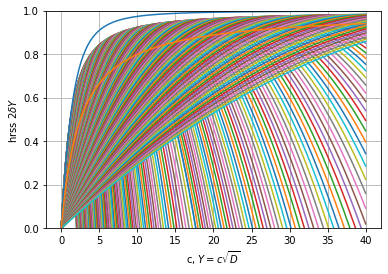

In [124]:
c = np.linspace(0, 40, 1000)
for k in np.append ( np.linspace(0.4, 1, 100), np.linspace(1, 1.4, 100)):
    plt.plot(c, 2*c * (e**(-2*k*k) * erf(k*2**0.5) * (2/pi)**0.5 - e**(-4*k*k) * c/pi), label='k=' + str(k))
    plt.xlabel('c, $Y=c \sqrt{D}$')
    plt.ylabel('hrss $2 \delta Y$')
plt.plot(c, efn(c*e**-0.5), label='qaoa E')
k=0
plt.plot(c, 2*c/(e**(2*k*k)*(8*pi)**0.5 * (1 - erf(k*2**0.5)) + 2*(c)), label='corrected prob hrss 2*delta')
k=1
# plt.plot(c, 2*c/(e**(2*k*k)*(8*pi)**0.5 * (1 - erf(k*2**0.5)) + 2*(c)), label='corrected prob hrss 2*delta')

# plt.legend()
plt.grid()
plt.ylim(0, 1)

when does prob hrss beat hrss?
when d < e/2

matches when c = (erf(k sqrt2) - 1/2) / (e^(-2k^2) sqrt(2/pi))

(0, 1)

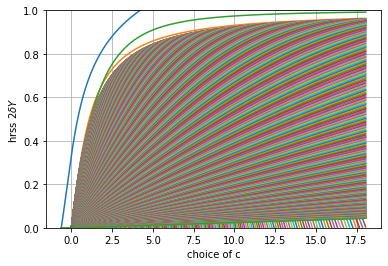

In [271]:
inps = np.linspace(0, 1.3, 1000)
c = (erf(inps*2**0.5) - 0.5) / (e**(-2*inps*inps) * (2/pi)**0.5)
plt.plot(c, inps, label='maximum k value')


plt.plot(c, 2*c/(e**(2*inps**2)*(8*pi)**0.5 * (1 - erf(inps*2**0.5)) + 2*(c)), label='corrected prob hrss 2*delta')
plt.plot(c, efn(c*e**-0.5), label='qaoa E')

for k in np.append ( np.linspace(0.2, 1, 300), np.linspace(1, 1.8, 300)):
    plt.plot(c, 2*c * (e**(-2*k*k) * erf(k*2**0.5) * (2/pi)**0.5 - e**(-4*k*k) * c/pi), label='k=' + str(k))
    plt.xlabel('c, $Y=c \sqrt{D}$')
    plt.ylabel('hrss $2 \delta Y$')
    
plt.grid()
plt.xlabel('choice of c')
# plt.legend()
plt.ylim(0, 1)

prob hrss starts winning around c=0.5.. but the advantage is so tiny! 2-3%?

advantage?


(0.8905533782861066, 1.07)

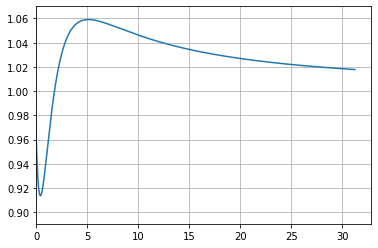

In [126]:
inps = np.linspace(0, 1.4, 1000)
c = (erf(inps*2**0.5) - 0.5) / (e**(-2*inps*inps) * (2/pi)**0.5)
# plt.plot(c, inps, label='maximum k value')
phrss = 2*c/(e**(2*inps**2)*(8*pi)**0.5 * (1 - erf(inps*2**0.5)) + 2*(c))
qaoa = efn(c*e**-0.5)

# plt.plot(c, phrss, label='corrected prob hrss 2*delta')
# plt.plot(c,qaoa, label='qaoa E')
plt.plot(c, qaoa/phrss)
plt.grid()
plt.xlim(0)
plt.ylim(None,1.07)

In [127]:
max((qaoa/phrss)[c > 0])

1.0591025013616575

(0, 1)

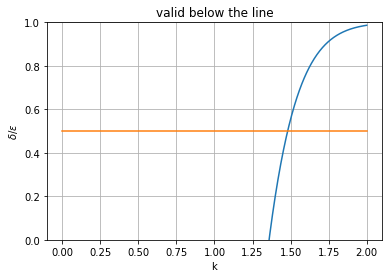

In [128]:
c = 100
inps = np.linspace(0, 2, 1000)
plt.plot(inps, erf(inps*2**0.5) - c*e**(-2*inps**2)*(2*pi)**-0.5)
plt.plot(inps, [0.5,]*len(inps))
plt.title("valid below the line")
plt.xlabel("k")
plt.ylabel('$\delta / \epsilon$')
plt.grid()
plt.ylim(0, 1)

from wolfram

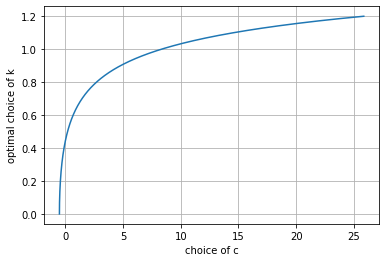

In [129]:
inps = np.linspace(0, 1.2, 1000)
plt.plot(-1/2 + e**(2* inps**2) *(pi/2)**0.5 * inps * erf(inps*2**0.5), inps)
plt.xlabel('choice of c')
plt.ylabel('optimal choice of k')
plt.grid()

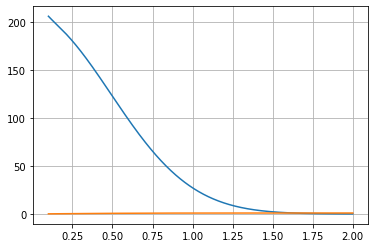

In [130]:
c = 100
inps = np.linspace(0.1, 2, 1000)
plt.plot(inps, e**(inps**2 * (-2)) * (2*c + 1/ inps))
plt.plot(inps, erf(inps*2**0.5))
plt.grid()

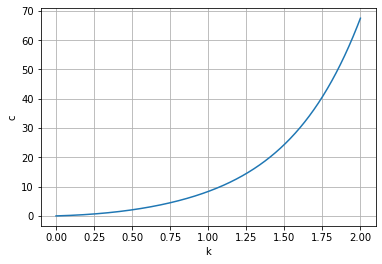

In [131]:
inps = np.linspace(0, 2, 1000)
plt.plot(inps, (pi/2)**0.5 * e**(2*inps) * erf(inps*2**0.5) - inps/2)
plt.xlabel('k')
plt.ylabel('c')
plt.grid()

In [158]:
inps = 0.43845
0.5 * e**(2*inps**2)*erf(inps*2**0.5)*(2*pi)**0.5 - 1/(2*inps)

-0.09930174987454143

In [169]:
inps[np.argmin( abs ( 0.5 * e**(2*inps**2)*erf(inps*2**0.5)*(2*pi)**0.5 - 1/(2*inps) ))]

/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


0.43844384438443845

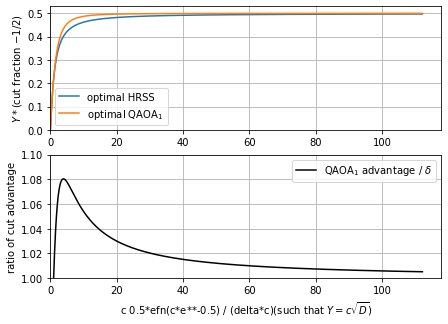

In [558]:
fig, axs = plt.subplots(2, 1, figsize=(7, 5))

inps = np.linspace(0.4, 1.5, 10000)
c = 0.5 * e**(2*inps**2)*erf(inps*2**0.5)*(2*pi)**0.5 - 1/(2*inps)
delta = erf(inps*2**0.5)*e**(-2*inps**2)*(2*pi)**-0.5 + e**(-4*inps**2)/(2*pi*inps)
barrier = (2*pi)**-0.5 * e**(-2*inps**2)

axs[0].plot(c,  delta*c, label='optimal HRSS')
axs[0].plot(c, 0.5*efn(c*e**-0.5), label='optimal QAOA$_1$')
axs[0].grid()
axs[0].set_ylabel('$Y *$(cut fraction $- 1/2$)')
axs[0].legend()
axs[0].set_xlim(0)
axs[0].set_ylim(0)


axs[1].plot(c, 0.5*efn(c*e**-0.5) / (delta*c), label='QAOA$_1$ advantage / $\delta$', color='black')
axs[1].grid()
axs[1].set_ylabel('ratio of cut advantage')
axs[1].legend()
axs[1].set_xlim(0)
axs[1].set_ylim(1, 1.1)

plt.xlabel('c 0.5*efn(c*e**-0.5) / (delta*c)(such that $Y = c \sqrt{D} $)')

plt.savefig('HRSSvQAOA_YthetaD.png')



In [563]:
c[3980]

4.027234869425715

In [564]:
(0.5*efn(c*e**-0.5) / (delta*c))[3980]

1.080381942002912

In [133]:
def get_outs(c, inps):
    outs = (2/pi)**0.5 * e**(-2*inps**2) * erf(inps*2**0.5) - e**(-4*inps**2)*c/pi
    return outs

(-0.1, 0.5)

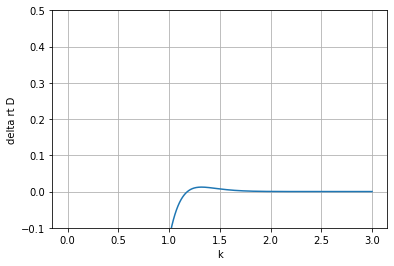

In [134]:
# this is the best delta given Y = c rt D
c = 40
plt.xlabel('k')
plt.ylabel('delta rt D')
inps = np.linspace(0, 3, 1000)
plt.plot(inps, get_outs(c, inps))
plt.grid()
plt.ylim(-0.1, 0.5)

Text(0, 0.5, 'delta rt D')

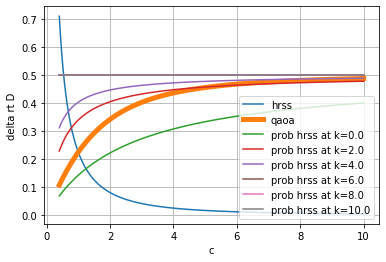

In [135]:
cs = np.linspace(0.4, 10, 1000)
inps = np.linspace(0, 3, 1000)
plt.plot(cs, [max(get_outs(c, inps))/c for c in cs], label='hrss')
plt.plot(cs, 0.5*efn(cs*e**-0.5), label='qaoa', linewidth=5)
for k in np.linspace(0, 10, 6):
    plt.plot(cs, cs/((8*pi)**0.5 * e**(2*k**2) * (1 - erf(k*2**0.5)) + 2*cs), label='prob hrss at k=' + str(k)[:4])
plt.grid()
plt.legend()
plt.xlabel('c')
plt.ylabel('delta rt D')

(0, 117.62147662122774)

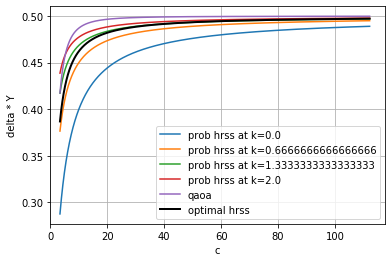

In [395]:
inps = np.linspace(0.8, 1.5, 1000)
c=0.5 * e**(2*inps**2)*erf(inps*2**0.5)*(2*pi)**0.5 - 1/(2*inps)
delta =(erf(inps*2**0.5)*e**(-2*inps**2)*(2*pi)**-0.5 + e**(-4*inps**2)/(2*pi*inps))
for k in np.linspace(0, 2, 4):
    plt.plot(c, c/((e**(2*k**2) * (8*pi)**0.5 * (1 - erf(k*2**0.5))) + 2*c),  label='prob hrss at k='+ str(k))
plt.plot(c, 0.5*efn(c*e**-0.5), label='qaoa')
plt.plot(c, c*delta, label='optimal hrss', color='black', linewidth=2)

plt.xlabel('c')
plt.ylabel('delta * Y')
plt.grid()
plt.legend()
plt.xlim(0)
# plt.ylim(0)

In [137]:
cs = np.linspace(0, 25, 1000)
plt.plot(cs, c
plt.grid()

SyntaxError: invalid syntax (<ipython-input-137-8243d8fba430>, line 3)

Give D, c then plot delta per k

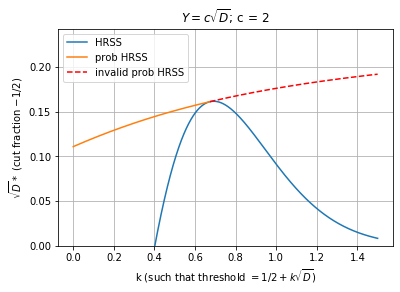

In [465]:
c = 2
inps = np.linspace(0, 1.5, 10000)
delta = (2/pi)**0.5 * e**(-2*inps**2) * erf(inps*2**0.5) - c*e**(-4*inps**2)/pi
plt.plot(inps, delta, label='HRSS')
# plt.plot(inps, [0 if ok(delta[idx], k) else 1 for idx, k in enumerate(inps)], label='prob formula ok')
plt.plot(inps, [ 1/((8*pi)**0.5 * e**(2*k**2) * (1 - erf(k*2**0.5)) + 2*c)  \
                if ok(delta[idx], k) else None  \
                for idx, k in enumerate(inps)], label='prob HRSS')

plt.plot(inps, [ 1/((8*pi)**0.5 * e**(2*k**2) * (1 - erf(k*2**0.5)) + 2*c)  \
                if not ok(delta[idx], k) else None  \
                for idx, k in enumerate(inps)], 'r--', label='invalid prob HRSS')
plt.grid()
plt.xlabel('k (such that threshold $= 1/2 + k \sqrt{D} $)')
plt.ylabel('$\sqrt{D} *$ (cut fraction $- 1/2$)')
plt.title("$Y = c \sqrt{D}$; c = " + str(c))
plt.legend()
plt.ylim(0, 1.5*max(delta))
plt.savefig('HRSSvsprobHRSS_thetaD.png')

In [336]:
# when is prob hrss valid?
def ok(deltartD, k):
    return deltartD < e**(-2*k*k) * (2*pi)**-0.5

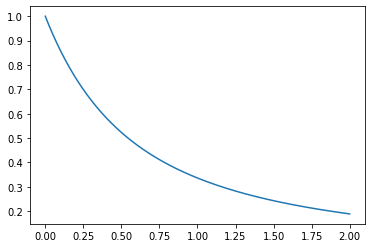

In [392]:
inps = np.linspace(0, 2, 1000)
plt.plot(inps, e**(2*inps**2) * (1 - erf(inps*2**0.5)))